# Fitness Class Attention
**Signature** : *Puchong Saribut*

**Problem** : Many membors reserved a class but didn't attend.

**Requirement** : Predict new incoming booking whether membor will attend or not.

**Business outcome** : Fitness can serve their class to more customers. More membors in a class, more impressive, better experience.

This notebook will show :
1. Some insights that probably be helpful.
2. Maching learning model to predict whether membor will join the class or not.

**Note for myself**
- Good data structure
- Good visualization

In [469]:
#import module
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

**Import raw data (local file)**

In [470]:
file_path = '/Users/User/Documents/GitHub/project/Fitness_Attention_Prediction/fitness_class_2212.csv'
data = pd.read_csv(file_path)

In [471]:
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [472]:
data.set_index('booking_id', inplace = True)

In [473]:
data.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,,,,,,,
1,17,79.56,8,Wed,PM,Strength,0
2,10,79.01,2,Mon,AM,HIIT,0
3,16,74.53,14,Sun,AM,Strength,0
4,5,86.12,10,Fri,AM,Cycling,0
5,15,69.29,8,Thu,AM,HIIT,0


-----------------------------------------------------------------------------

### Preprocessing Data

Do a little missing data check up!

In [474]:
data.isnull().sum()

months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

There is only 20 NA values in weight columns from all 1500 rows. So, I decided to drop all missing values.

In [475]:
data = data.dropna()

In [476]:
data.duplicated().sum()

0

In [477]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 1 to 1500
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1480 non-null   int64  
 1   weight            1480 non-null   float64
 2   days_before       1480 non-null   object 
 3   day_of_week       1480 non-null   object 
 4   time              1480 non-null   object 
 5   category          1480 non-null   object 
 6   attended          1480 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 92.5+ KB


In [478]:
data.days_before.value_counts()

10         290
2          197
8          190
12         177
14         170
4          153
6           70
7           37
3           31
5           27
11          25
13          25
15          24
9           23
1            8
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64

There are some excess words in data. So, it should be trimmed out then convert them to integer.

In [479]:
data['days_before'] = data.days_before.str.strip(' days').astype('int')
data.days_before.value_counts()

10    296
2     198
8     191
12    180
14    173
4     156
6      73
7      38
3      32
5      28
13     26
11     25
15     24
9      23
1       9
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

That's what we want!
Let's check the next one, day_of_week.

In [480]:
data.day_of_week.value_counts()

Fri          277
Thu          235
Mon          215
Sun          211
Sat          200
Tue          192
Wed           79
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

There are some exceed categories which are duplicated with other. Let's change them to the right one.

In [481]:
mapping = {'Fri.':'Fri', 'Wednesday':'Wed', 'Monday':'Mon'}
data['day_of_week'] = data.day_of_week.replace(mapping, regex = True)

In [482]:
data.day_of_week.value_counts()

Fri    303
Thu    235
Mon    225
Sun    211
Sat    200
Tue    192
Wed    114
Name: day_of_week, dtype: int64

Great!
Then, it will be great if 'day_of_week' feature is sortable. It makes me easier for data visualization.

In [483]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data.day_of_week = pd.Categorical(data.day_of_week, categories = days)

In [484]:
data.time.value_counts()

AM    1130
PM     350
Name: time, dtype: int64

In [485]:
data.category.value_counts()

HIIT        657
Cycling     370
Strength    231
Yoga        135
Aqua         74
-            13
Name: category, dtype: int64

In [486]:
data.attended.value_counts()

0    1031
1     449
Name: attended, dtype: int64

In [487]:
data.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,,,,,,,
1,17,79.56,8,Wed,PM,Strength,0
2,10,79.01,2,Mon,AM,HIIT,0
3,16,74.53,14,Sun,AM,Strength,0
4,5,86.12,10,Fri,AM,Cycling,0
5,15,69.29,8,Thu,AM,HIIT,0


### Exploratory Data Analysis

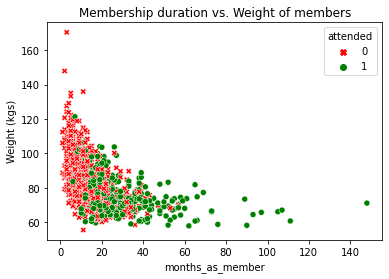

In [488]:
markers = {1: "o", 0 : "X"}
sns.scatterplot(data = data, x = 'months_as_member', y = 'weight', hue = 'attended', palette=['red', 'green'], markers = markers, style = 'attended')
plt.title('Membership duration vs. Weight of members')
plt.ylabel('Weight (kgs)')
plt.show()

**INSIGHT :** Membors who have been in memborship longer and has less weight tend to attend their booked class more often, **significantly**.

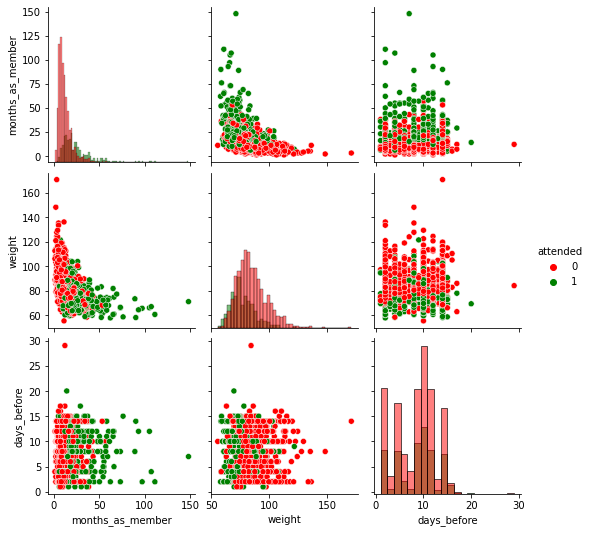

In [489]:
sns.pairplot(data = data, diag_kind = 'hist',hue = 'attended', palette=['red', 'green'])
plt.show()

<AxesSubplot:xlabel='time', ylabel='count'>

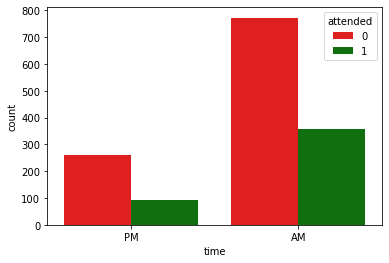

In [490]:
sns.countplot(data = data, x = 'time', hue = 'attended', palette= ['red', 'green'])

In [491]:
data.groupby('time')['attended'].value_counts(normalize=True)

time  attended
AM    0           0.683186
      1           0.316814
PM    0           0.740000
      1           0.260000
Name: attended, dtype: float64

### Preprocessing Data

I decided not to use 'category' as a feature because it seems not correlated.

First, 'day_of_week' and 'time' columns are categorial type. So, let's encode them.

In [492]:
model_data = pd.concat([data.drop(['day_of_week', 'time'], axis = 1), pd.get_dummies(data[['day_of_week', 'time']], drop_first=True)], axis=1)

In [493]:
X = model_data.drop(['category', 'days_before', 'attended'], axis=1)
y = model_data['attended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

This task, I use distance-based model, then I have to do a standardization.

In [514]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[['weight', 'months_as_member']])
X_test_scaled = scaler.transform(X_test[['weight', 'months_as_member']])


**Note** : After I tried once, using only weight and months_as_member features return better accuracy. So, I will use only 2 features for the model.

### Baseline model

The baseline model accuracy : 0.779


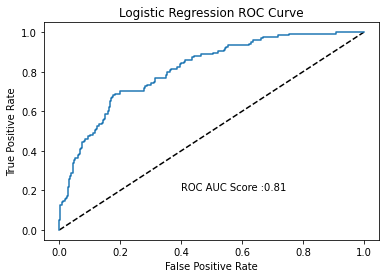

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print('The baseline model accuracy : {:.3f}'.format(accuracy_score(y_pred_logreg, y_test)))

y_pred_probs_logreg = logreg.predict_log_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_probs_logreg)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.annotate('ROC AUC Score :{:.2f}'.format(roc_auc_score(y_test, y_pred_probs_logreg)),
             (0.4,0.2))
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       309
           1       0.72      0.44      0.55       135

    accuracy                           0.78       444
   macro avg       0.76      0.69      0.70       444
weighted avg       0.77      0.78      0.76       444



### Comparision model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 5,
                            random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('The comparision model accuracy : {:.3f}'.format(accuracy_score(y_pred_rf, y_test)))
print(classification_report(y_test, y_pred_rf))

The comparision model accuracy : 0.768
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       309
           1       0.66      0.48      0.56       135

    accuracy                           0.77       444
   macro avg       0.73      0.69      0.70       444
weighted avg       0.76      0.77      0.76       444



### Addition

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_rf = {
    'n_estimators' : [100, 300, 500],
    'max_depth' : [4, 5, 6, 7, 8],
    'min_samples_leaf' : [0.1, 0.2]
}

random_rf = RandomizedSearchCV(
    estimator = rf,
    param_distributions = params_rf,
    cv = 3,
    scoring = 'accuracy',
    verbose = 1,
    n_jobs = -1
)

random_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_leaf': [0.1, 0.2],
                                        'n_estimators': [100, 300, 500]},
                   scoring='accuracy', verbose=1)

In [ ]:
print('RF Train Accuracy : {:.2f}'.format(random_rf.best_score_))

y_pred_rf_tuned = random_rf.best_estimator_.predict(X_test_scaled)

print('The comparision model accuracy : {:.3f}'.format(accuracy_score(y_test, y_pred_rf_tuned)))
print(classification_report(y_test, y_pred_rf_tuned))


RF Train Accuracy : 0.78
The comparision model accuracy : 0.757
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       309
           1       0.65      0.44      0.52       135

    accuracy                           0.76       444
   macro avg       0.72      0.67      0.68       444
weighted avg       0.74      0.76      0.74       444

